# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import numpy as np
import pandas as pd
import pvlib
import pytz
import folium
import geopy.distance
from dotenv import load_dotenv
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
load_dotenv()
NREL_API_KEY = os.getenv("NREL_API_KEY")
NREL_API_EMAIL = os.getenv("NREL_API_EMAIL")

In [3]:
import sys

sys.path.append("/Users/andrebach/code/solmap")
%load_ext autoreload
%autoreload 2

In [4]:
import data_generation

In [5]:
%config InlineBackend.figure_format='retina'

# Run it

In [6]:
congressional_summary_df = data_generation.geometry.load_congresional_district_points(
    file_to_load="congressional_geometry_v3.csv",
)

In [7]:
generation_df = data_generation.solar.generate_values_at_points(
    congressional_summary_df
)

i=0
i=100
i=200
i=300
i=400
Saved to output_csv/generation_2024_11_20T17_01_24_450803.csv


In [8]:
mexico_summary_df = data_generation.geometry.load_congresional_district_points(
    file_to_load="mexico_geometry_v1.csv",
)

In [9]:
generation_mexico_df = data_generation.solar.generate_values_at_points(
    mexico_summary_df
)

i=0
Cache miss at 21.9, -102.3: computing from scratch.
Wrote solar_local_cache/solar_weather_lat21.9_lon-102.3.csv
Wrote solar_local_cache/pv_lat21.9_lon-102.3.csv
Cache miss at 22.1, -102.1: computing from scratch.
Wrote solar_local_cache/solar_weather_lat22.1_lon-102.1.csv
Wrote solar_local_cache/pv_lat22.1_lon-102.1.csv
Cache miss at 21.9, -102.7: computing from scratch.
Wrote solar_local_cache/solar_weather_lat21.9_lon-102.7.csv
Wrote solar_local_cache/pv_lat21.9_lon-102.7.csv
Cache miss at 22.4, -102.3: computing from scratch.
Wrote solar_local_cache/solar_weather_lat22.4_lon-102.3.csv
Wrote solar_local_cache/pv_lat22.4_lon-102.3.csv
Cache miss at 22.0, -102.1: computing from scratch.
Wrote solar_local_cache/solar_weather_lat22.0_lon-102.1.csv
Wrote solar_local_cache/pv_lat22.0_lon-102.1.csv
Cache miss at 22.0, -102.4: computing from scratch.
Wrote solar_local_cache/solar_weather_lat22.0_lon-102.4.csv
Wrote solar_local_cache/pv_lat22.0_lon-102.4.csv
Cache miss at 22.1, -102.3: co

In [24]:
all_generation_df = pd.concat([generation_df, generation_mexico_df])

In [10]:
# El Paso, Texas
lat_texas = 32.1
lon_texas = -110.3
# NYC, NY
lat_ny = 40.8
lon_ny = -73.9
# Seattle, Washintona
lat_wash = 47.5
lon_wash = -122.4

In [19]:
all_geo_df = pd.concat([congressional_summary_df, mexico_summary_df])

In [20]:
generation_df_texas = data_generation.solar.simulate_for_constant_clouds(
    lat_texas,
    lon_texas,
    all_geo_df,
    pv_array_tilt=None,
)
generation_df_ny = data_generation.solar.simulate_for_constant_clouds(
    lat_ny,
    lon_ny,
    all_geo_df,
    pv_array_tilt=None,
)
generation_df_wash = data_generation.solar.simulate_for_constant_clouds(
    lat_wash,
    lon_wash,
    all_geo_df,
    pv_array_tilt=None,
)

i=0
i=100
i=200
i=300
i=400
i=500
i=600
i=700
Missing solar weather for 18.8, -108.4
i=800
i=900
i=1000
i=1100
i=1200
i=1300
i=1400
i=1500
i=1600
i=1700
i=1800
i=1900
i=2000
i=2100
i=2200
i=2300
i=2400
i=2500
i=2600
i=2700
i=2800
i=2900
Saved to output_csv/generation_clouds_matching_lat32.1_lon-110.3_tilt32.1_2024_11_20T21_23_29_950406.csv
i=0
i=100
i=200
i=300
i=400
i=500
i=600
i=700
Missing solar weather for 18.8, -108.4
i=800
i=900
i=1000
i=1100
i=1200
i=1300
i=1400
i=1500
i=1600
i=1700
i=1800
i=1900
i=2000
i=2100
i=2200
i=2300
i=2400
i=2500
i=2600
i=2700
i=2800
i=2900
Saved to output_csv/generation_clouds_matching_lat40.8_lon-73.9_tilt40.8_2024_11_20T21_29_29_836998.csv
i=0
i=100
i=200
i=300
i=400
i=500
i=600
i=700
Missing solar weather for 18.8, -108.4
i=800
i=900
i=1000
i=1100
i=1200
i=1300
i=1400
i=1500
i=1600
i=1700
i=1800
i=1900
i=2000
i=2100
i=2200
i=2300
i=2400
i=2500
i=2600
i=2700
i=2800
i=2900
Saved to output_csv/generation_clouds_matching_lat47.5_lon-122.4_tilt47.5_2024_1

In [21]:
generation_df_horizontal = data_generation.solar.generate_values_at_points(
    all_geo_df,
    pv_array_tilt=0,
)
generation_df_texas_horizontal = data_generation.solar.simulate_for_constant_clouds(
    lat_texas,
    lon_texas,
    all_geo_df,
    pv_array_tilt=0,
)
generation_df_ny_horizontal = data_generation.solar.simulate_for_constant_clouds(
    lat_ny,
    lon_ny,
    all_geo_df,
    pv_array_tilt=0,
)
generation_df_wash_horizontal = data_generation.solar.simulate_for_constant_clouds(
    lat_wash,
    lon_wash,
    all_geo_df,
    pv_array_tilt=0,
)

i=0
i=100
i=200
i=300
i=400
i=500
i=600
i=700
i=800
i=900
i=1000
i=1100
i=1200
Wrote cache for 18.5, -99.1
i=1300
i=1400
i=1500
i=1600
i=1700
i=1800
i=1900
i=2000
i=2100
i=2200
i=2300
i=2400
i=2500
i=2600
i=2700
i=2800
i=2900
Saved to output_csv/generation_2024_11_20T21_41_18_000993.csv
i=0
i=100
i=200
i=300
i=400
i=500
i=600
i=700
i=800
i=900
i=1000
i=1100
i=1200
i=1300
i=1400
i=1500
i=1600
i=1700
i=1800
i=1900
i=2000
i=2100
i=2200
i=2300
i=2400
i=2500
i=2600
i=2700
i=2800
i=2900
Saved to output_csv/generation_clouds_matching_lat32.1_lon-110.3_tilt0_2024_11_20T21_47_14_039977.csv
i=0
i=100
i=200
i=300
i=400
i=500
i=600
i=700
i=800
i=900
i=1000
i=1100
i=1200
i=1300
i=1400
i=1500
i=1600
i=1700
i=1800
i=1900
i=2000
i=2100
i=2200
i=2300
i=2400
i=2500
i=2600
i=2700
i=2800
i=2900
Saved to output_csv/generation_clouds_matching_lat40.8_lon-73.9_tilt0_2024_11_20T21_53_10_160567.csv
i=0
i=100
i=200
i=300
i=400
i=500
i=600
i=700
i=800
i=900
i=1000
i=1100
i=1200
i=1300
i=1400
i=1500
i=1600
i=1700

In [45]:
df = generation_df_horizontal
ncolors = 20
palette = sns.color_palette("flare_r", ncolors)
hex_colors = palette.as_hex()
vmin = 140
vmax = 285
# vmin = df.generation.min()
# vmax = df.generation.max()
vrange = vmax - vmin
df["color"] = df.generation.apply(
    lambda x: hex_colors[int((ncolors - 1) * (x - vmin) / vrange)]
)
m = folium.Map(
    location=(df.lat.mean(), df.lon.mean()),
    zoom_start=4,
    height=650,
    width=1083,
)
# folium.TileLayer('cartodbdark_matter').add_to(m)
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row.lat, row.lon],
        fill=True,
        stroke=False,
        fill_opacity=0.8,
        radius=3,
        color=row.color,
        tooltip=f"{row.geometry_name}, {row.generation:0.1f}",
        popup=f"{row.geometry_name}, {row.generation:0.1f}, {row.lat}, {row.lon}",
    ).add_to(m)
m

In [25]:
data_generation.solar.save_as_geojson(
    all_geo_df,
    {
        "generation_real": all_generation_df,
        "generation_texas_clouds": generation_df_texas,
        "generation_ny_clouds": generation_df_ny,
        "generation_wash_clouds": generation_df_wash,
        "generation_real_horizontal": generation_df_horizontal,
        "generation_texas_clouds_horizontal": generation_df_texas_horizontal,
        "generation_ny_clouds_horizontal": generation_df_ny_horizontal,
        "generation_wash_clouds_horizontal": generation_df_wash_horizontal,
    },
)

Missing values for 17 geos, continuing.
Saved to output_json/solar_points_2024_11_20T21_59_17_285774.json


True

Werote output_csv/timeseries_lat32.1_lon-110.3.csv
Werote output_csv/timeseries_lat47.5_lon-122.4.csv
Werote output_csv/timeseries_lat40.8_lon-73.9.csv


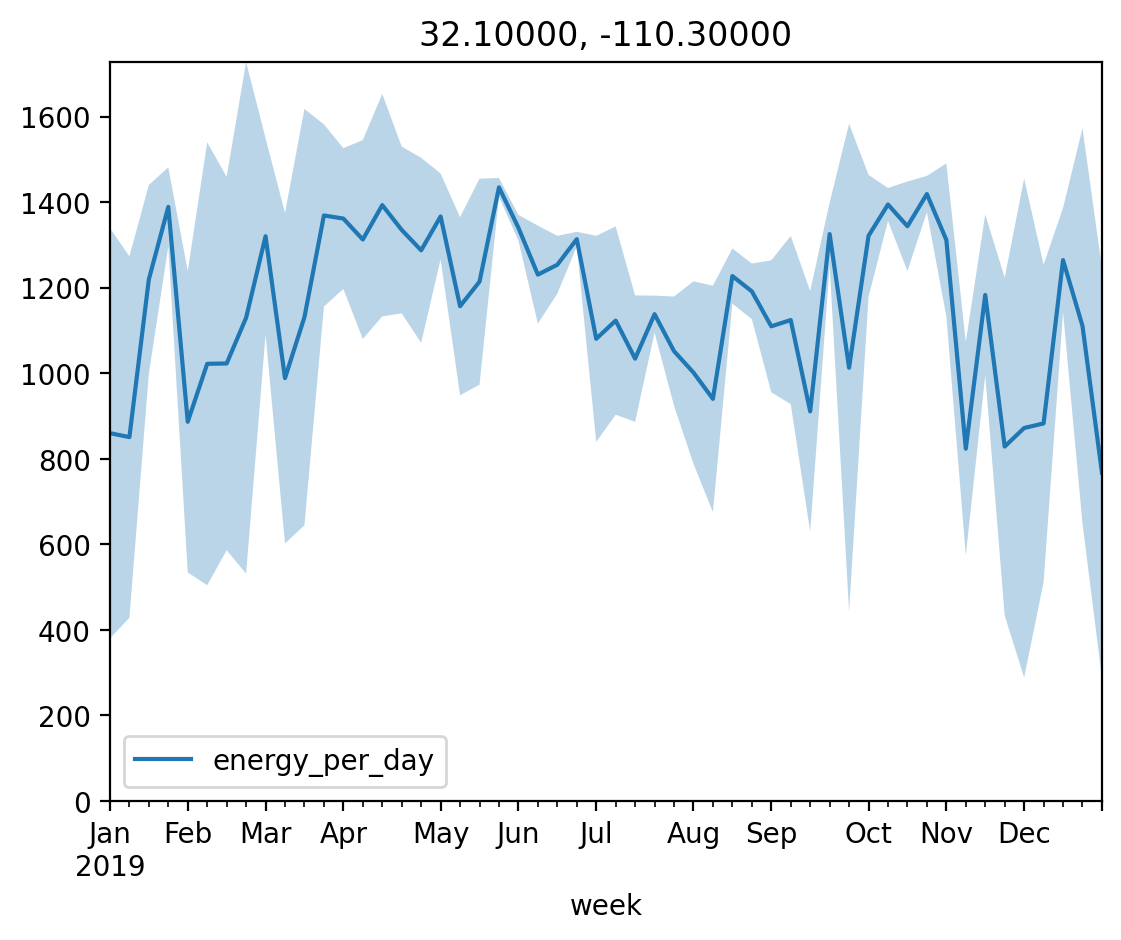

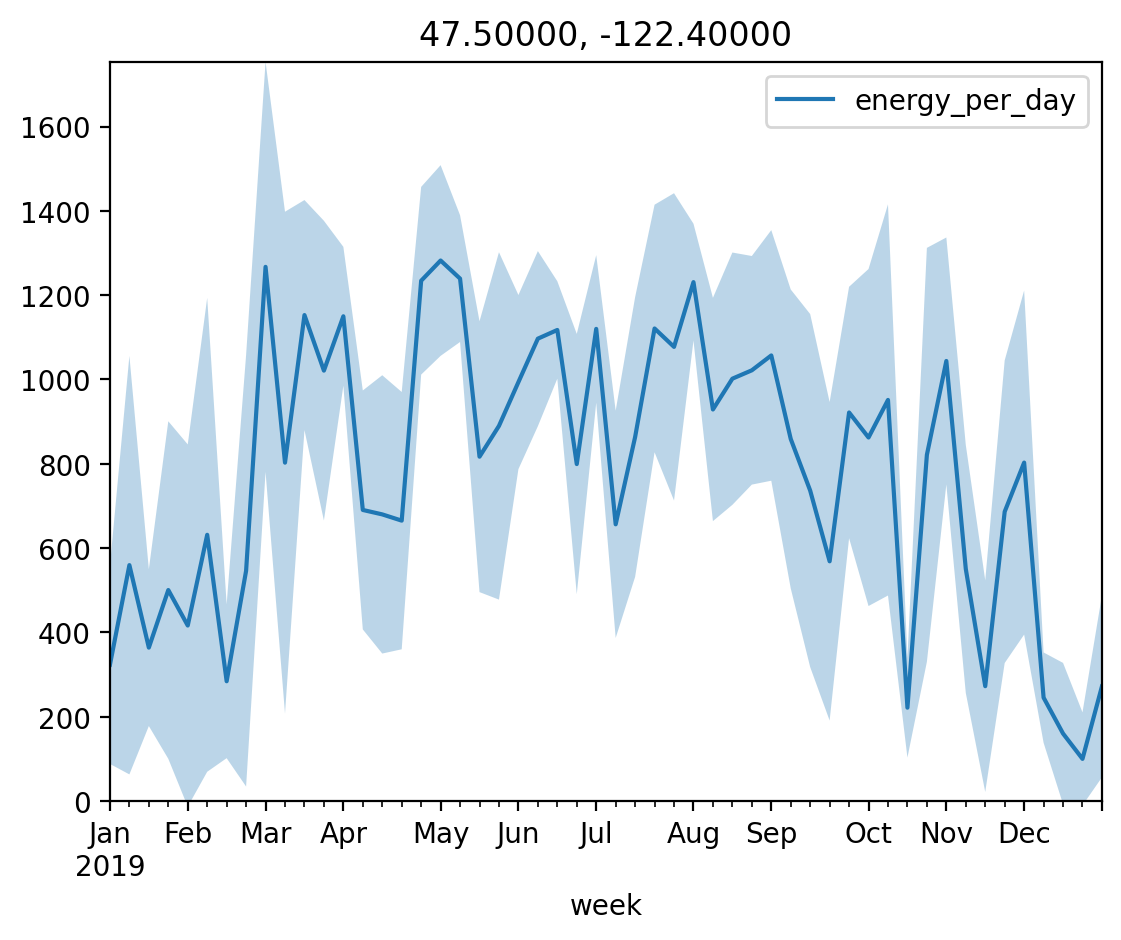

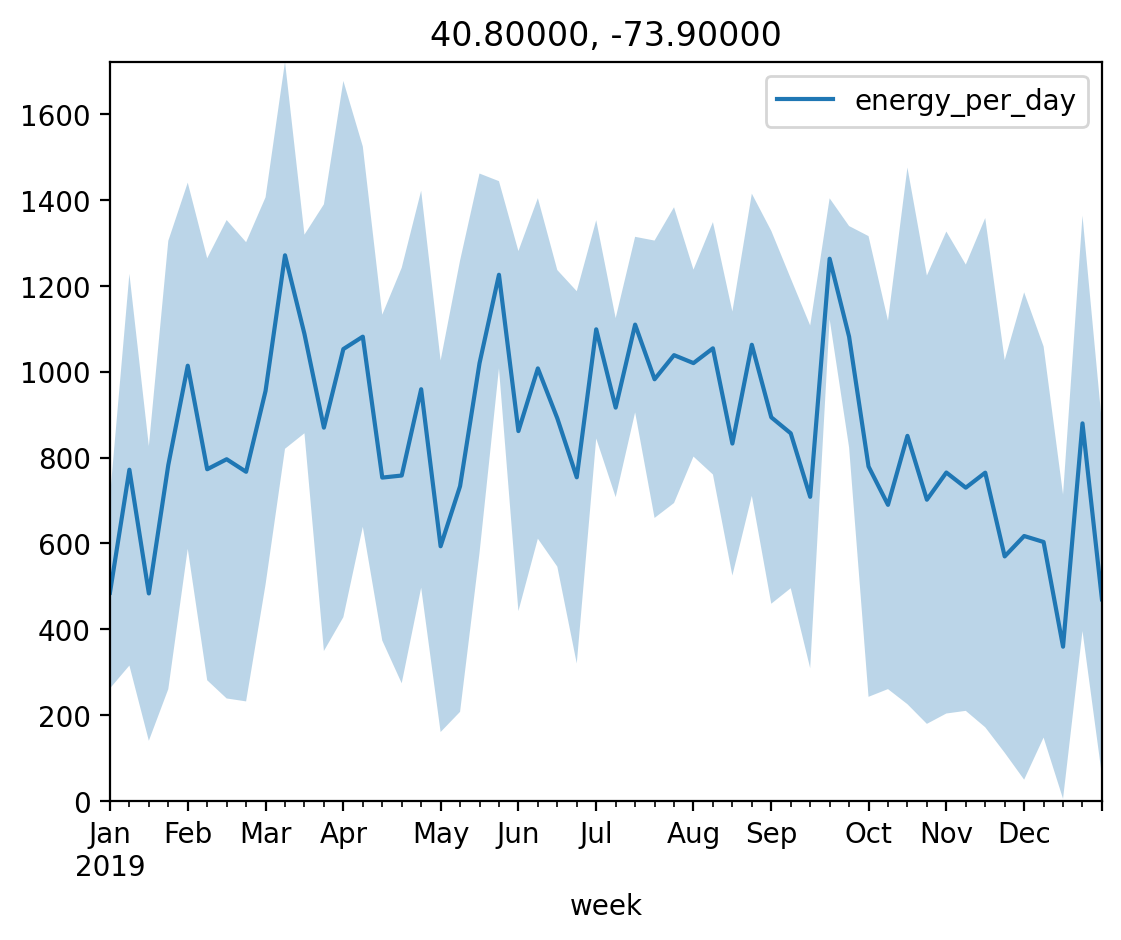

In [26]:
for lat, lon in [
    (lat_texas, lon_texas),
    (lat_wash, lon_wash),
    (lat_ny, lon_ny),
]:
    data_generation.solar.make_timeseries(lat, lon)

In [34]:
every_value = pd.concat(
    {
        "generation_real": all_generation_df,
        "generation_texas_clouds": generation_df_texas,
        "generation_ny_clouds": generation_df_ny,
        "generation_wash_clouds": generation_df_wash,
        "generation_real_horizontal": generation_df_horizontal,
        "generation_texas_clouds_horizontal": generation_df_texas_horizontal,
        "generation_ny_clouds_horizontal": generation_df_ny_horizontal,
        "generation_wash_clouds_horizontal": generation_df_wash_horizontal,
    }.values()
)

In [39]:
every_value[["generation"]].describe(percentiles=[.01, .025, .25, .50, .75, .975, .99])

generation
count  23263.000000
mean     200.503511
std       35.458820
min      132.508636
1%       152.491809
2.5%     155.062104
25%      167.740861
50%      183.567245
75%      236.448566
97.5%    259.024650
99%      263.967050
max      277.528109

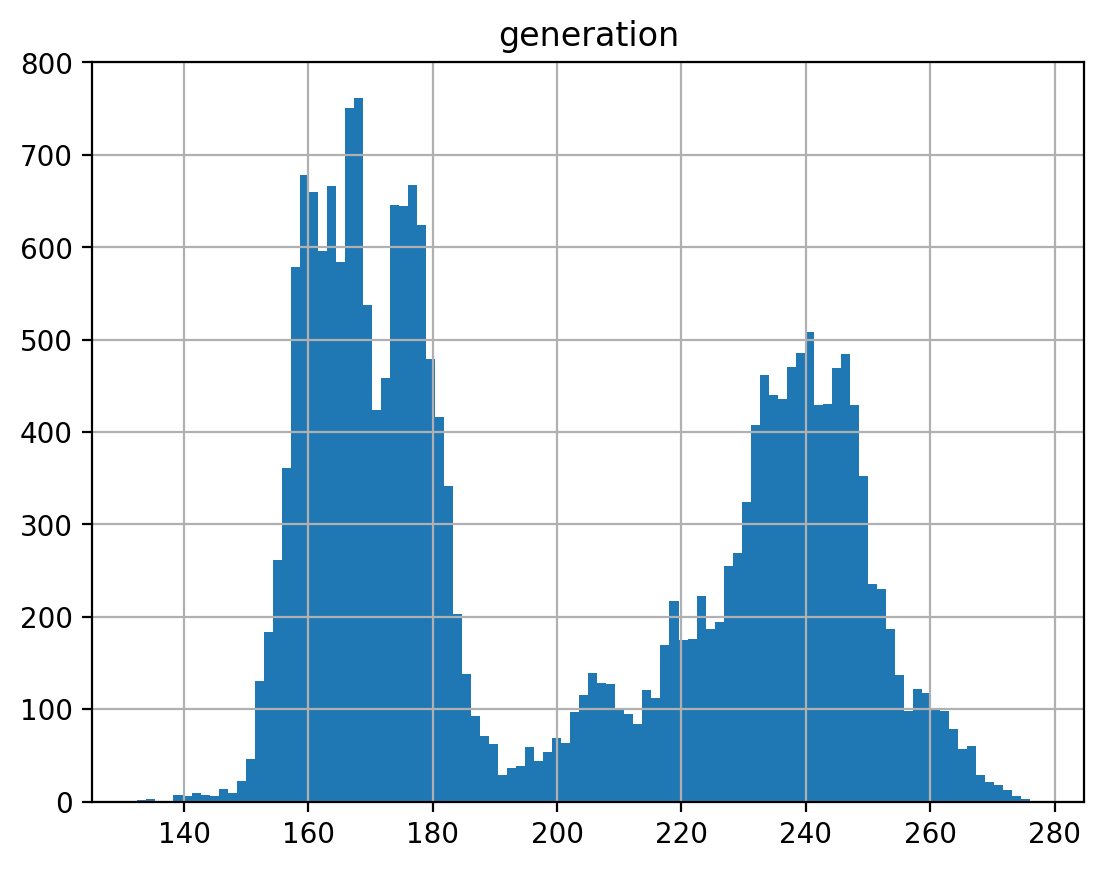

In [43]:
axes = every_value[["generation"]].hist(bins=100)

# End of notebook